# Overall Stargal Stats

Preliminary work for star-gal separation. Performs statistics on lephare outputs carried on two synthetic magnitude libraries (one composed of star SED, another of galaxies SEDs).

SPLIT add two columns to LePHARE:
 - pdz_flag: describes the quality of the computed redshift
 - s-type: the most likely type of star (OBAFGKM) if the observed source was a star


In [6]:
### Libraries ###
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from lephare import statsplot as lsp; reload(lsp)
# %matplotlib widget
%matplotlib inline

## Tests on DC1

In [7]:
### Generate pandas df from output catalog ###
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DC1_Buzzard_PICKLES_LSST.out')
# CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DC1_Buzzard_PICKLES_LSST_RMon.out')
# CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DC1_Buzzard_PICKLES_LSST_typed.out')

photoz_dc1 = lsp.lephare_to_pandas(CAT_OUT)
### Clean error values
photoz_dc1 = photoz_dc1[photoz_dc1['Z_BEST'] != -99.9]
print(list(photoz_dc1.columns.values))
photoz_dc1

['IDENT', 'Z_BEST', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'SCALE_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'MAG_OBS5', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ERR_MAG_OBS5', 'ZSPEC']


,IDENT,Z_BEST,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MAG_OBS3,MAG_OBS4,MAG_OBS5,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ERR_MAG_OBS5,ZSPEC
0,2996,0.1805,0.1861,0.1798,1.791080,47,0.004133,6,-99.90,1.000000e+09,...,23.729,23.685,23.519,0.140,0.019,0.010,0.014,0.024,0.065,0.21434
1,87746,0.2879,0.2896,0.2899,67.651000,63,0.280733,6,-99.90,1.000000e+09,...,20.362,20.068,20.098,0.008,0.005,0.005,0.005,0.005,0.006,0.30069
2,258981,0.4508,0.3965,0.4216,1.593370,82,0.004077,6,-99.90,1.000000e+09,...,25.933,25.831,25.633,0.394,0.100,0.054,0.092,0.150,0.426,0.36735
3,403445,1.4950,1.4576,1.5228,0.132588,38,0.187665,6,0.07,4.078160e+00,...,26.683,26.273,25.491,0.776,0.235,0.152,0.204,0.237,0.467,1.22110
5,375196,0.6490,0.6499,0.6498,45.236800,27,0.506465,6,-99.90,1.000000e+09,...,22.607,22.267,21.936,0.111,0.017,0.008,0.007,0.008,0.016,0.72114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111166,338492,0.2571,0.2575,0.2579,11.450800,87,0.015529,6,-99.90,1.000000e+09,...,23.079,22.944,22.861,0.040,0.009,0.007,0.009,0.013,0.035,0.29785
111167,249734,0.1015,0.1012,0.1005,0.456600,99,0.000610,6,-99.90,1.000000e+09,...,24.061,24.379,24.327,0.040,0.012,0.011,0.018,0.046,0.127,0.10619
111168,414119,1.6750,1.6698,1.6726,0.830528,50,2.010180,6,-99.90,1.000000e+09,...,24.106,23.717,23.362,0.120,0.027,0.016,0.018,0.027,0.054,1.62676
111169,10558,0.2933,0.3100,0.2816,0.750606,68,0.001579,6,2.00,5.100430e+00,...,26.047,25.719,25.866,0.573,0.131,0.061,0.098,0.163,0.440,0.38128


In [8]:
### error observed mag bining
photoz_dc1_errmag0001 = photoz_dc1[photoz_dc1['ERR_MAG_OBS0']<=0.01]
photoz_dc1_errmag001 = photoz_dc1[(photoz_dc1['ERR_MAG_OBS0']>0.01) & (photoz_dc1['ERR_MAG_OBS0']<=0.1)]
photoz_dc1_errmag01 = photoz_dc1[(photoz_dc1['ERR_MAG_OBS0']>0.1)]# & (photoz_dc1['ERR_MAG_OBS0']<=1)]
#photoz_dc1_errmag1 = photoz_dc1[(photoz_dc1['ERR_MAG_OBS0']>1)]

### observed mag bining
photoz_dc1_mag20 = photoz_dc1[photoz_dc1['MAG_OBS0']<=20]
photoz_dc1_mag23 = photoz_dc1[(photoz_dc1['MAG_OBS0']>20) & (photoz_dc1['MAG_OBS0']<=23)]
photoz_dc1_mag26 = photoz_dc1[(photoz_dc1['MAG_OBS0']>23) & (photoz_dc1['MAG_OBS0']<=26)]
photoz_dc1_mag27 = photoz_dc1[(photoz_dc1['MAG_OBS0']>26)]



In [9]:
photoz_dc1_magbin = (photoz_dc1_mag27, photoz_dc1_mag26, photoz_dc1_mag23, photoz_dc1_mag20)
photoz_dc1_magbin_labels = ['Gmag > 26', 'Gmag < 26', 'Gmag < 23', 'Gmag < 20']
photoz_dc1_emagbin = (photoz_dc1_errmag01, photoz_dc1_errmag001, photoz_dc1_errmag0001)
photoz_dc1_emagbin_labels = ['Gemag > 0.1', 'Gemag < 0.1', 'Gemag < 0.01']

zz_plot

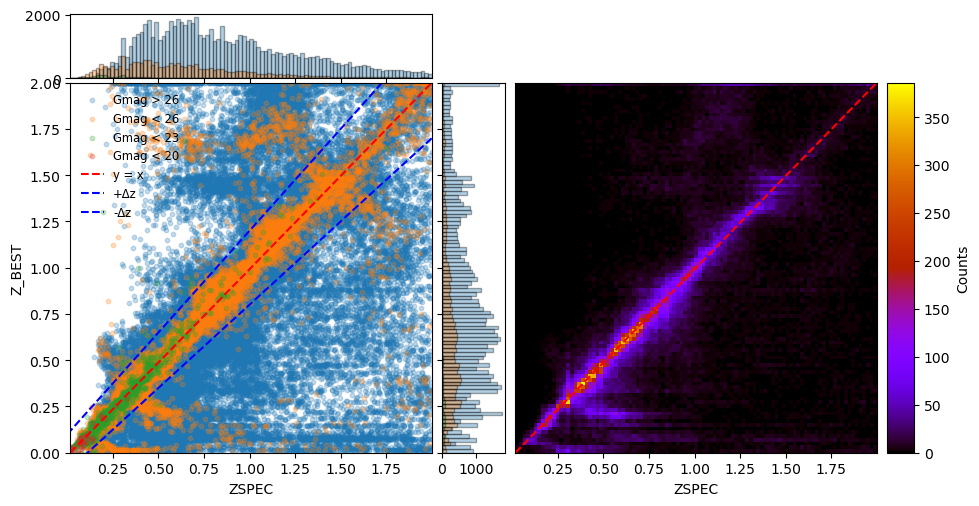

In [10]:
lsp.scatter_vs_hist2D(data=photoz_dc1_magbin, cmaps='gnuplot', deltaz=0.1, labels=photoz_dc1_magbin_labels, xlabel='ZSPEC', ylabel='Z_BEST')

Chi2 distribution, pit and qq-plot

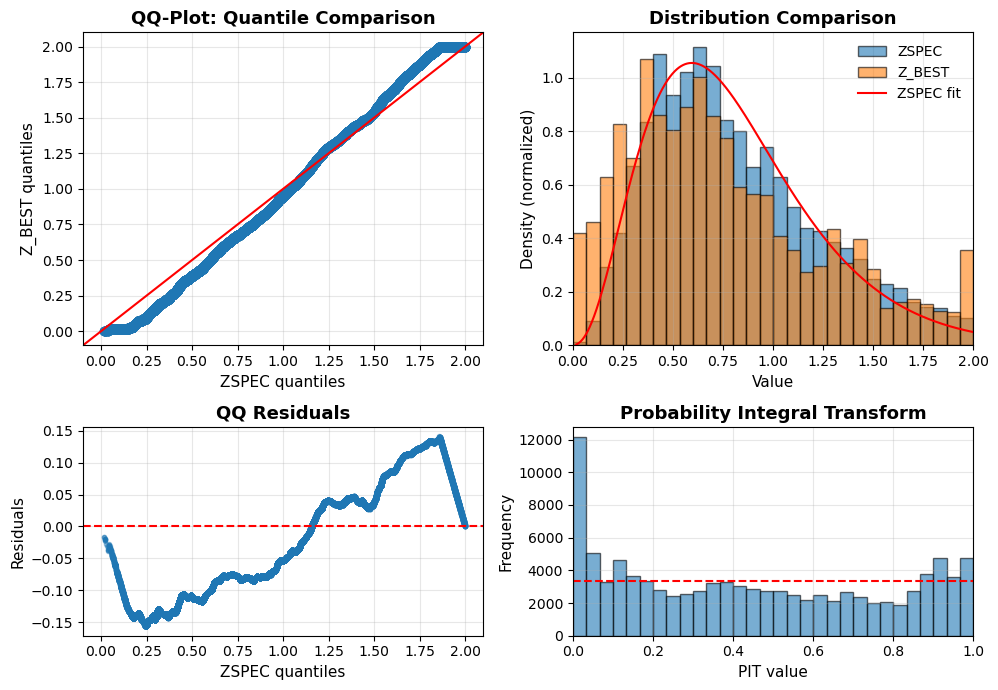

In [25]:
lsp.pit_qqplot(data = photoz_dc1)

/home/hallouin/Documents/t_hall/lephare/src/lephare/statsplot.py:510: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


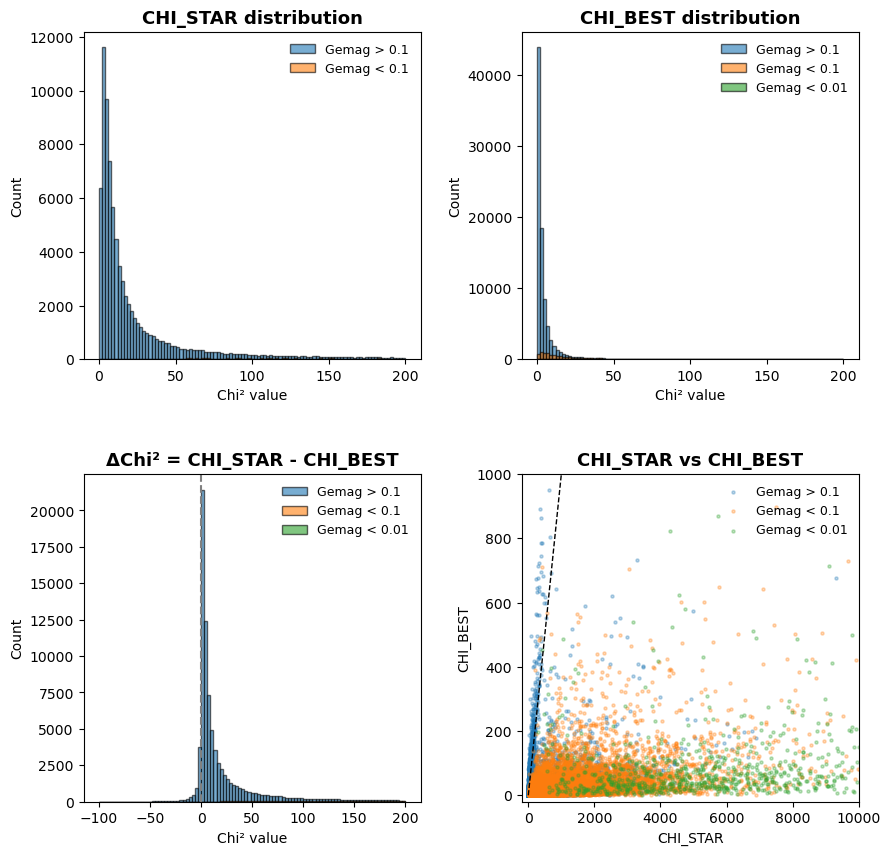

In [18]:
# %matplotlib widget

lsp.chi_stats(data = photoz_dc1_emagbin, mask_min=-100, mask_max=200, bins=100, scatter_xlim=(-200, 10000), scatter_ylim=(-20, 1000), labels=photoz_dc1_emagbin_labels)

$\Delta\chi$ analysis

In [19]:
delta = photoz_dc1['CHI_STAR']-photoz_dc1['CHI_BEST']
delta = delta[photoz_dc1['ERR_MAG_OBS0']<=0.1]

In [ ]:
print("n(Delta>0) / n = ", len(delta[delta>0])/len(delta))

In [ ]:
lsp.more_chi_stats(data = photoz_dc1, mask_min=-100, mask_max=300, bins=100)

In [ ]:
plt.figure()
delta_chi=photoz_dc1['CHI_STAR'] - photoz_dc1['CHI_BEST']
hist_range = (-1000,1000)
plt.hist(delta_chi, bins=100, alpha=0.7, edgecolor='black', color='purple', range=hist_range)
plt.axvline(0, color='gray', linestyle='--')
plt.show()

flag VS stype

In [ ]:
###Flag and type distribution

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(zphota["PDZ_FLAG"][zphota["PDZ_FLAG"]>=0], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("PDZ flag distribution")
plt.subplot(122)
plt.title("S-type distribution")
plt.hist(zphota["S_TYPE"], bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)

# plt.ylim(0,0.010)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams.update({'font.size': 6})
contingency = pd.crosstab(zphota["S_TYPE"], zphota["PDZ_FLAG"])

# Plot avec seaborn
plt.figure(figsize=(18,16))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 6.5})
plt.title("Distribution des flags par type d'étoile")
plt.ylabel("Type d'étoile")
plt.xlabel("Flag")
plt.show()


In [ ]:
plt.figure(figsize=(15,13))

sns.stripplot(x=zphota["CHI_STAR"]-zphota["CHI_BEST"], y=zphota["S_TYPE"], jitter=True, size=6)
plt.title("DeltaChi distribution as a function of source-type")
plt.ylabel("Type d'étoile")
plt.xlabel("Delta Chi =  Chi_star - Chi_best")
plt.xlim(-1e4,1e4)
plt.show()

In [ ]:
###Flag and type distribution

plt.figure(figsize=(4, 4))
mask=(zphota["CHI_STAR"]<1e4) & (zphota["CHI_BEST"]<1e4)
plt.hist(zphota["CHI_STAR"] - zphota["CHI_BEST"], bins=1000000, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Delta Chi dist")


# plt.ylim(0,0.010)
plt.legend()
plt.show()

In [ ]:
### Generate pandas df from output catalog ###
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DESstars_Buzzard_PICKLES_DES_kk_typed.out')


photoz_des = lsp.lephare_to_pandas(CAT_OUT)
### Clean error values
photoz_des = photoz_des[photoz_des['Z_BEST'] != -99.9]
print(list(photoz_des.columns.values))
photoz_des